# 1. Import Library

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

D:\ac\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 
train=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=10, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 120s - loss: 0.4716 - acc: 0.8515 - val_loss: 0.0999 - val_acc: 0.9696
Epoch 2/10
 - 118s - loss: 0.1427 - acc: 0.9566 - val_loss: 0.0652 - val_acc: 0.9801
Epoch 3/10
 - 110s - loss: 0.1046 - acc: 0.9690 - val_loss: 0.0543 - val_acc: 0.9834
Epoch 4/10
 - 114s - loss: 0.0837 - acc: 0.9749 - val_loss: 0.0467 - val_acc: 0.9871
Epoch 5/10
 - 115s - loss: 0.0714 - acc: 0.9788 - val_loss: 0.0448 - val_acc: 0.9873
Epoch 6/10
 - 114s - loss: 0.0641 - acc: 0.9802 - val_loss: 0.0406 - val_acc: 0.9883
Epoch 7/10
 - 122s - loss: 0.0556 - acc: 0.9833 - val_loss: 0.0393 - val_acc: 0.9886
Epoch 8/10
 - 140s - loss: 0.0491 - acc: 0.9843 - val_loss: 0.0369 - val_acc: 0.9897
Epoch 9/10
 - 117s - loss: 0.0475 - acc: 0.9854 - val_loss: 0.0350 - val_acc: 0.9895
Epoch 10/10
 - 108s - loss: 0.0424 - acc: 0.9867 - val_loss: 0.0326 - val_acc: 0.9904


In [4]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               225920    
__________

In [5]:
#train=model.fit(x=x_Train4D_normalize, 
                  #      y=y_TrainOneHot,validation_split=0.2, 
                   #     epochs=20, batch_size=300,verbose=2)

In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train.history[train_acc])
    plt.plot(train.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [7]:
def show_train_loss(train_acc,test_acc):
    plt.plot(train.history[train_acc])
    plt.plot(train.history[test_acc])
    plt.title('Train History')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

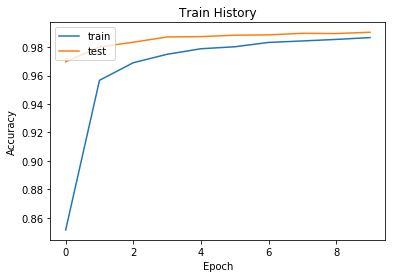

In [10]:
show_train_history('acc','val_acc')

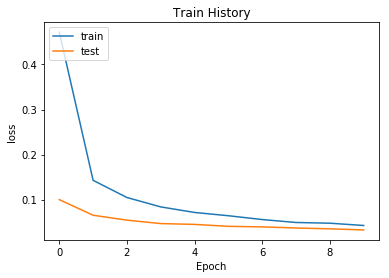

In [11]:
show_train_loss('loss','val_loss')

In [12]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 13s 1ms/step


0.9915

In [13]:
prediction=model.predict_classes(x_Test4D_normalize)

In [14]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# 查看預測結果

In [20]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=25):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

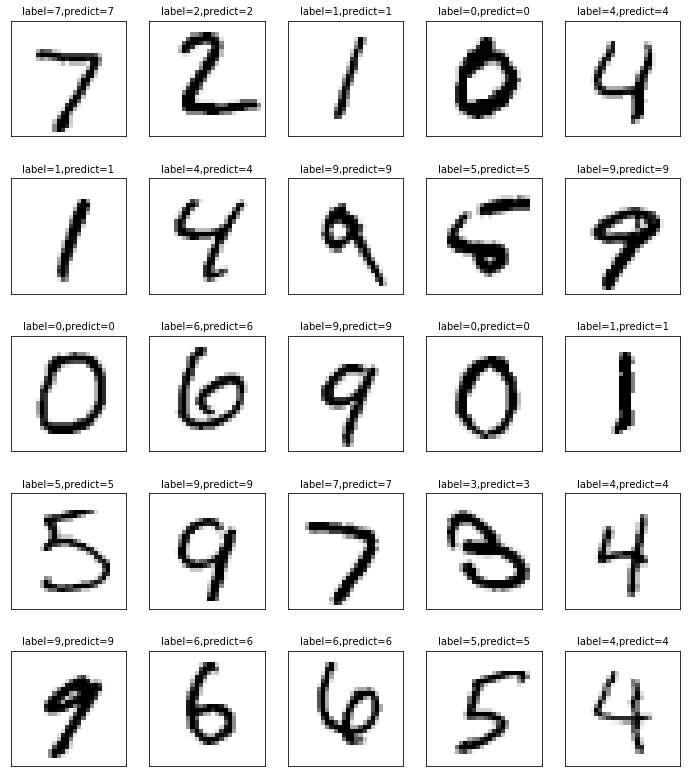

In [21]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [17]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1132,1,0,0,0,1,1,0,0
2,1,0,1026,0,0,0,0,4,1,0
3,0,0,1,1002,0,2,0,3,2,0
4,0,0,0,0,979,0,1,0,0,2
5,1,0,0,5,0,882,3,0,0,1
6,2,2,0,0,2,2,948,0,2,0
7,0,2,4,0,0,0,0,1020,1,1
8,2,1,2,1,1,1,0,2,962,2


In [18]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [19]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2597,5,3
5937,5,3
